## 누락데이터 처리

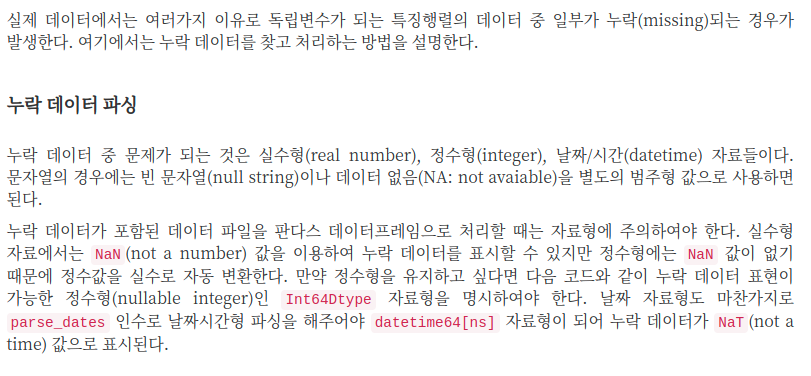

In [2]:
import pandas as pd
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])

In [4]:
df.dtypes

x1             Int64
x2           float64
x3           float64
x4    datetime64[ns]
x5            object
dtype: object

In [5]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [6]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [7]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [8]:
!pip3 install missingno

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 215 kB 521 kB/s eta 0:00:01


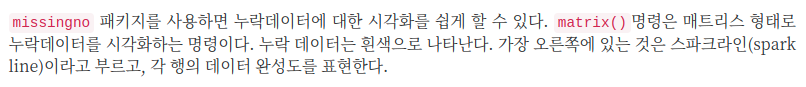

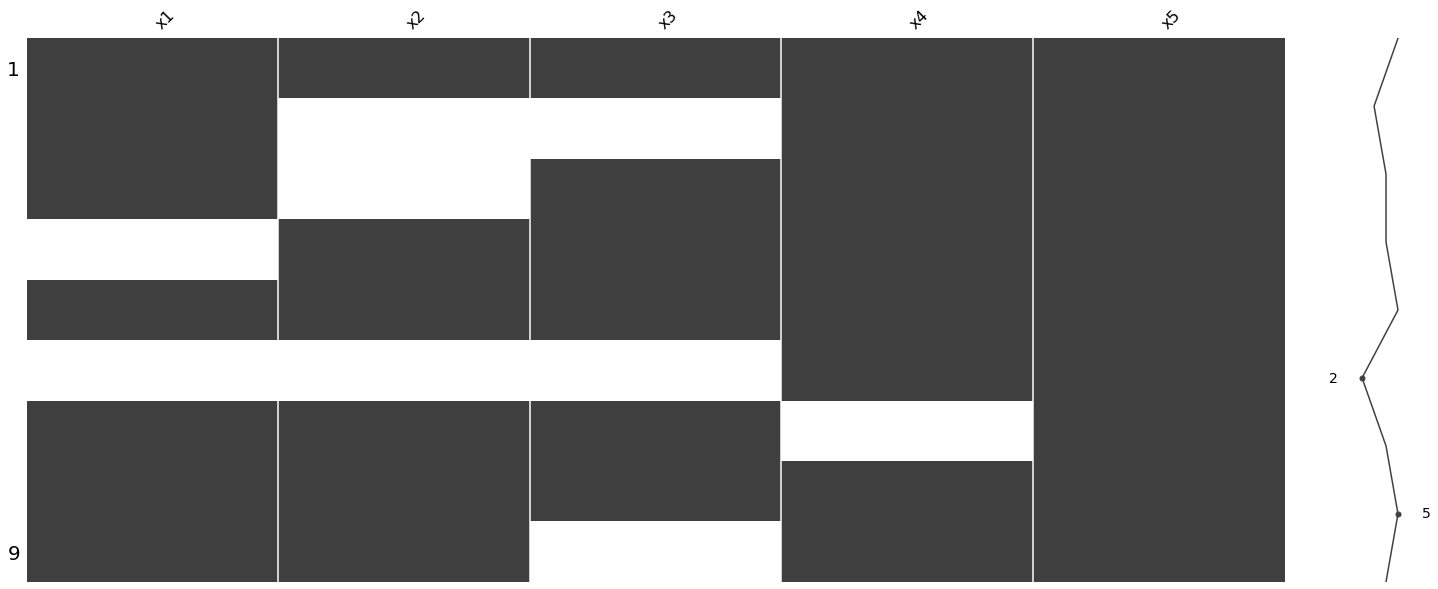

In [10]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df)
plt.show()

만약 각 열의 누락데이터가 얼마나 존재하는지에 대해서만 시각화 하고 싶다면, bar()명령을 사용하면 된다.

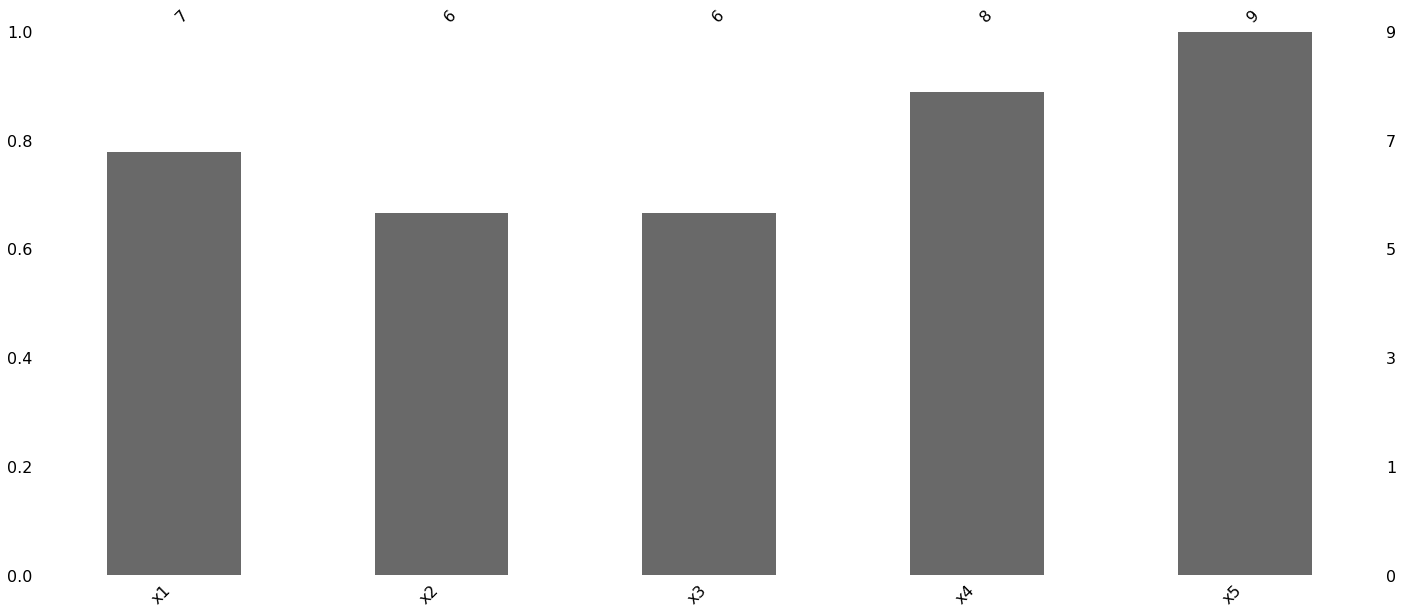

In [11]:
msno.bar(df)
plt.show()

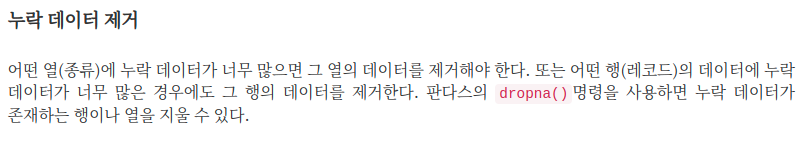

In [12]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [15]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


- thresh는 Nan값이 아닌 행의 개수

In [13]:
df.dropna(thresh=4)

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [14]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


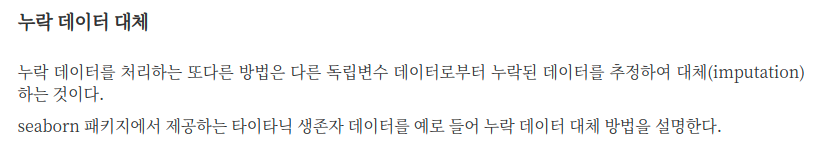

In [17]:
import seaborn as sns

In [18]:
df = sns.load_dataset("titanic")
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


타이타닉 생존자 데이터의 각 열이 의미하는 바는 다음과 같다.

- survived : 생존 여부
- pclass : 승객의 클래스
- sex : 성별
- sibsp : 형제 혹은 자매의 수
- parch : 부모 혹은 자녀의 수
- fare : 탑승 요금
- embarked : 출발지의 고유 이니셜
- class : 선실의 클래스
- who : male, female을 man, woman으로 표기
- adult_male : 성인 남성 인지 아닌지 여부
- deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
- embark_town : 출발지
- alive : 생존 여부 데이터를 yes 혹은 no로 표기
- alone : 가족이 없는 경우 True

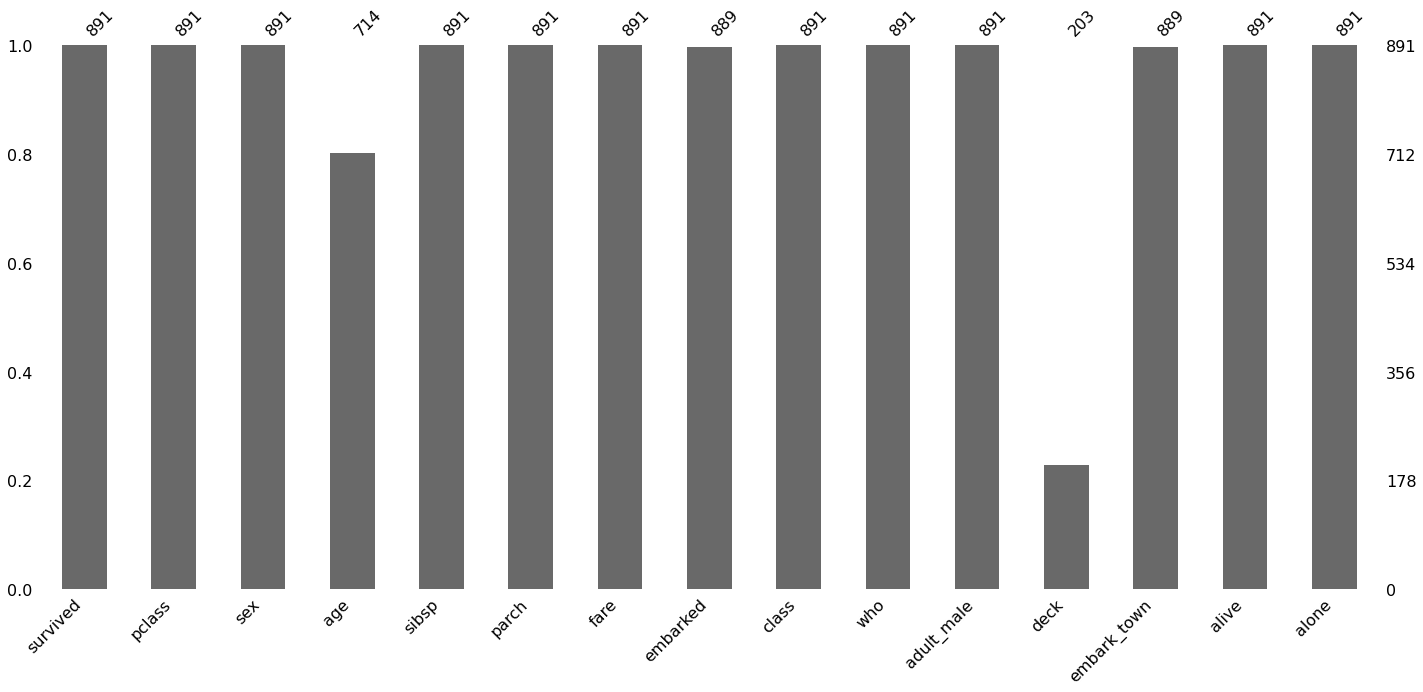

In [19]:
msno.bar(df)
plt.show()

In [20]:
# deck 누락데이터 절반이 넘음 -> 제거

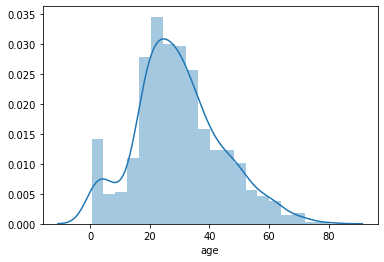

In [21]:
sns.distplot(df.age.dropna())
plt.show()

scikit-learn 패키지의 SimpleImputer 클래스를 사용하면 누락된 정보를 채울 수 있다.

In [22]:
from sklearn.impute import SimpleImputer

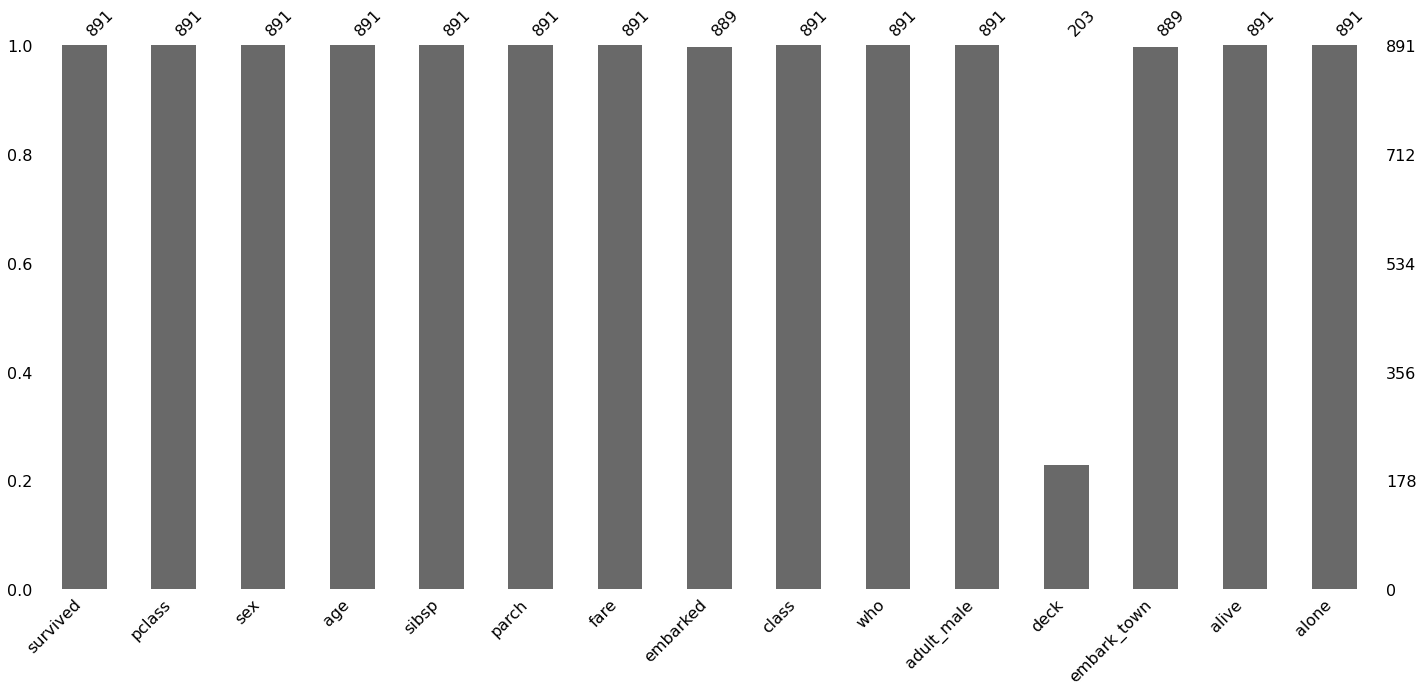

In [23]:
imputer = SimpleImputer(strategy="median")
df_copy1 = df.copy()
df_copy1['age']=imputer.fit_transform(df.age.values.reshape(-1,1))

msno.bar(df_copy1)
plt.show()

다른 데이터를 이용해서 더 그럴듯한 대체 방법을 사용할 수도 있다. 예를 들어 클래스(pclass)별로 평균 나이가 다르다는 점을 이용하여

In [24]:
df.groupby(df.pclass).age.median()

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

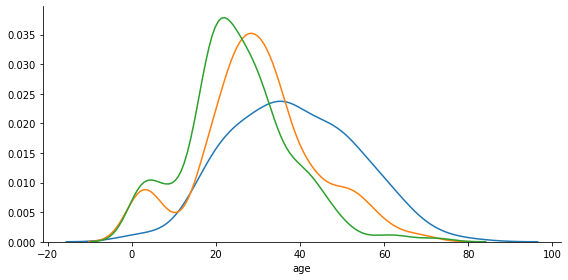

In [25]:
g = sns.FacetGrid(df, hue="pclass", height=4, aspect=2)
g.map(sns.kdeplot,"age")
plt.show()

클래스마다 별도로 대체값을 찾을 수도 있다.

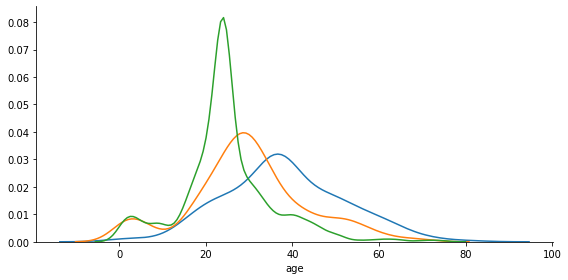

In [26]:
df_copy2 = df.copy()
df_copy2['age'] = df.groupby(df.pclass).age.transform(lambda x: x.fillna(x.median()))

g = sns.FacetGrid(df_copy2, hue="pclass", height=4, aspect=2)
g.map(sns.kdeplot, "age")
plt.show()